In [20]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [21]:
varname='tas'
rcp='rcp45'
modelNameLong='NCAR.CCSM4'
modelNameShort='CCSM4'
dates='210101-229912'

ens=1
inPath='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/'
inFile='%s%s/r%si1p1/%s_Amon_%s_%s_r%si1p1_%s.nc' %(inPath,modelNameLong,ens,varname,modelNameShort,rcp,ens,dates)
print(inFile)

/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/tas_Amon_CCSM4_rcp45_r1i1p1_210101-229912.nc


Read Data

In [22]:
ncfile=Dataset(inFile,'r')
lats = ncfile.variables['lat'][:]
ny=lats.size
lons = ncfile.variables['lon'][:]
nx=lons.size
nctime = ncfile.variables['time'][:]
nt=nctime.size
data=ncfile.variables[varname][:,:,:]
ncfile.close()

Plot first time point

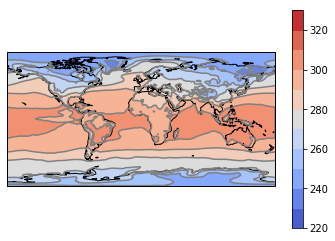

In [23]:
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(220,340,10)
x=np.ones((ny,nx))*data[0,:,np.newaxis]
datacyc,loncyc=add_cyclic_point(data[0,:,:],coord=lons)
contour=ax.contourf(loncyc, lats, datacyc, levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(loncyc,lats,datacyc,levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
plt.show()